<a href="https://colab.research.google.com/github/FekadeTafess/Health-Data-Analysis-Healthy-Minds-Survey-Data-/blob/main/HMS_Survey_Data_Correlation_and_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Text(0.5, 1.0, 'Correlation Heatmap: Financial Stressors vs Mental Health')

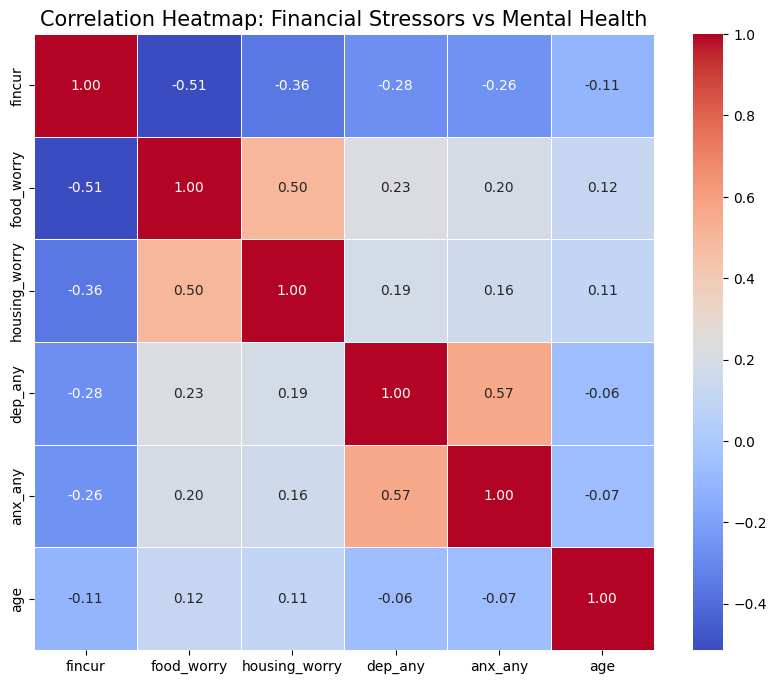

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('final_research_dataset.csv')

analysis_vars = [
    'fincur', 'food_worry', 'housing_worry',
    'dep_any', 'anx_any', 'age'
]

corr_matrix = df[analysis_vars].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Heatmap: Financial Stressors vs Mental Health', fontsize=15)

In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

df = pd.read_csv('final_research_dataset.csv')

# Combine all relevant columns and drop rows with NaNs to ensure data cleanliness
# for statsmodels. This handles the 'exog contains inf or nans' error.
model_columns = ['fincur', 'food_worry', 'housing_worry', 'age', 'gender_clean', 'dep_any', 'anx_any']
cleaned_df = df[model_columns].dropna()

X = cleaned_df[['fincur', 'food_worry', 'housing_worry', 'age', 'gender_clean']]
X = sm.add_constant(X)

# --- MODEL A: DEPRESSION (dep_any) ---
y_dep = cleaned_df['dep_any']
model_dep = sm.Logit(y_dep, X).fit()

#--- MODEL B: ANXIETY (anx_any)---
y_anx = cleaned_df['anx_any']
model_anx = sm.Logit(y_anx, X).fit()

print("--- DEPRESSION MODEL RESULTS ---")
print(model_dep.summary())
print("\nDepression Odds Ratios:")
print(np.exp(model_dep.params))

print("\n" + "="*50 + "\n")

print("--- ANXIETY MODEL RESULTS ---")
print(model_anx.summary())
print("\nAnxiety Odds Ratios:")
print(np.exp(model_anx.params))

Optimization terminated successfully.
         Current function value: 0.597347
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.582425
         Iterations 6
--- DEPRESSION MODEL RESULTS ---
                           Logit Regression Results                           
Dep. Variable:                dep_any   No. Observations:                69760
Model:                          Logit   Df Residuals:                    69754
Method:                           MLE   Df Model:                            5
Date:                Mon, 05 Jan 2026   Pseudo R-squ.:                 0.08568
Time:                        04:44:46   Log-Likelihood:                -41671.
converged:                       True   LL-Null:                       -45576.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------